# Segunda Questão - Regressão 

## Sumário

* Bibliotecas
* Pré-Processamento
     * Verificando Dados
     * Dados Ausentes
     * Dados Duplicados
     * Dados Não Numéricos
     * Correlação
     * Identificado Outliers
* Normalização dos Dados
* Divisão da Base de Dados - 70/30
* Aplicação do Algoritmo de KNN
* Aplicação do Algoritmo de Árvore de Decisão
* Validação Cruzada
* Conclusão

 



# Bibliotecas

Assim como na primeira questão, primeiro é necessário realizar a importação das dependências. 

In [2]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import seaborn as sns

from scipy import stats
from sklearn import preprocessing, neighbors, model_selection, metrics, tree

# Base de Dados

Realizando a leitura da base de dados.

In [3]:
df_base = pd.read_csv('Metro_Interstate_Traffic_Volume.csv',delimiter=',') 
df_base.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


A partir da leitura da base de dados, temos as informações que ela possui 9 atributos ao todo. Só que 8 desses atributos são de entrada e 1 atributo é de saída, que é o _traffic_volume_.

# Pré-Processamento

Antes de tudo, é preciso realizar um pré-processamento na base de dados.

## Verificando os dados

In [4]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
holiday                48204 non-null object
temp                   48204 non-null float64
rain_1h                48204 non-null float64
snow_1h                48204 non-null float64
clouds_all             48204 non-null int64
weather_main           48204 non-null object
weather_description    48204 non-null object
date_time              48204 non-null object
traffic_volume         48204 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Foram obtidas informações dos atributos da base de dados. Aqui se pode confirmar que a base de dados possui tantos atributos numéricos (5 atributos) como atributos não numéricos (4 atributos). Provavelmente, os atributos não numéricos virão a ser convertidos para atributos numéricos, caso permaneçam na base.

## Dados Ausentes

A base de dados será verificada para saber se existem valores faltando nos atributos.

In [5]:
pd.set_option('display.max_rows', None)
df_base.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

Não há nenhuma instância nula nos atributos. Sendo assim, nada será feito para corrigir dados ausentes.

## Dados Duplicados

Verificando se existem dados duplicados. 

In [6]:
df_base[df_base.duplicated(keep=False)]


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
18696,None,286.290,0.0,0.0,1,Clear,sky is clear,2015-09-30 19:00:00,3679
18697,None,286.290,0.0,0.0,1,Clear,sky is clear,2015-09-30 19:00:00,3679
23850,None,289.060,0.0,0.0,90,Clouds,overcast clouds,2016-06-01 10:00:00,4831
23851,None,289.060,0.0,0.0,90,Clouds,overcast clouds,2016-06-01 10:00:00,4831
26783,None,289.775,0.0,0.0,56,Clouds,broken clouds,2016-09-21 15:00:00,5365
26784,None,289.775,0.0,0.0,56,Clouds,broken clouds,2016-09-21 15:00:00,5365
26979,None,287.860,0.0,0.0,0,Clear,Sky is Clear,2016-09-29 19:00:00,3435
26980,None,287.860,0.0,0.0,0,Clear,Sky is Clear,2016-09-29 19:00:00,3435
27170,None,279.287,0.0,0.0,56,Clouds,broken clouds,2016-10-07 18:00:00,4642
27171,None,279.287,0.0,0.0,56,Clouds,broken clouds,2016-10-07 18:00:00,4642


Esses são os dados duplicados da base de dados. Sendo assim, todas essas instâncias duplicadas serão removidas. 


In [7]:
df_base.drop_duplicates(keep = 'first', inplace = True)

In [8]:
df_base.reset_index(inplace = True)


In [9]:
df_base.drop(columns = ['index'],inplace = True)

## Dados Não Numéricos

Como dito anteriormente, a base de dados possui valores não numéricos em alguns atributos. Primeiramente, será realizada a verificação dos valores nesses atributos. 

In [10]:
print("Valores não numéricos presentes em 'date_time':",df_base['date_time'].unique(), "\n\n")
print("Valores não numéricos presentes em 'holiday':",df_base['holiday'].unique(), "\n\n")
print("Valores não numéricos presentes em 'weather_main':",df_base['weather_main'].unique(), "\n\n")
print("Valores não numéricos presentes em 'weather_description':",df_base['weather_description'].unique(), "\n\n")

Valores não numéricos presentes em 'date_time': ['2012-10-02 09:00:00' '2012-10-02 10:00:00' '2012-10-02 11:00:00' ...
 '2018-09-30 21:00:00' '2018-09-30 22:00:00' '2018-09-30 23:00:00'] 


Valores não numéricos presentes em 'holiday': ['None' 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day'] 


Valores não numéricos presentes em 'weather_main': ['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Squall' 'Smoke'] 


Valores não numéricos presentes em 'weather_description': ['scattered clouds' 'broken clouds' 'overcast clouds' 'sky is clear'
 'few clouds' 'light rain' 'light intensity drizzle' 'mist' 'haze' 'fog'
 'proximity shower rain' 'drizzle' 'moderate rain' 'heavy intensity rain'
 'proximity thunderstorm' 'thunderstorm with light rain'
 'proximity thunderstorm with rain' 'heavy snow' 'heavy intensity drizzle'
 's

Realizada a visualização dos valores. Agora, esses atributos serão verificados e tratados, caso necessário. 

### Separando o date_Time

O atributo **date_time** possui informações como ano, mês, dia, hora e dia da semana. Sendo assim, ele será expandido em novos 5 atributos (ano, mês, dia, hora e dia da semana). Isso foi feito para que se possa avaliar, da melhor forma, como esses atributos podem influenciar na saída do atributo desejado ( _traffic_volume_ ).


In [11]:
df_base['date_time'] = pd.to_datetime(df_base['date_time'])
df_base['year'] = df_base['date_time'].dt.year
df_base['month'] = df_base['date_time'].dt.month
df_base['day'] = df_base['date_time'].dt.day
df_base['hour'] = df_base['date_time'].dt.hour
df_base['weekday'] = df_base['date_time'].dt.weekday
df_base.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month,day,hour,weekday
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012,10,2,9,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012,10,2,10,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012,10,2,11,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012,10,2,12,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012,10,2,13,1


Sendo assim, não se faz mais necessário manter o atributo **date_time** na base de dados. 

In [12]:
df_base = df_base.drop(columns=['date_time'])
df_base.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,hour,weekday
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,9,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,10,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,11,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,2,12,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,2,13,1


### Holiday

None                         48126
Labor Day                        7
New Years Day                    6
Martin Luther King Jr Day        6
Christmas Day                    6
Thanksgiving Day                 6
Memorial Day                     5
Independence Day                 5
Columbus Day                     5
Washingtons Birthday             5
State Fair                       5
Veterans Day                     5
Name: holiday, dtype: int64


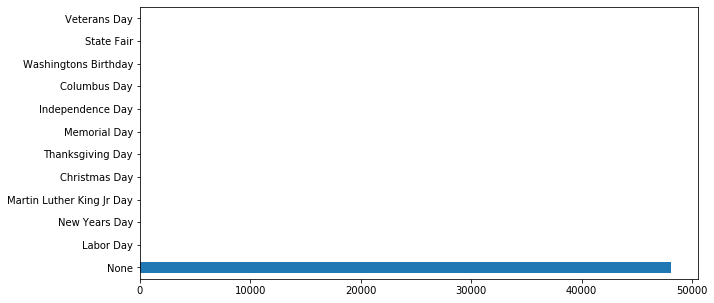

In [13]:
df_base['holiday'].value_counts().head(30).plot(kind='barh', figsize=(10,5))
qtde = df_base['holiday'].value_counts()
print(qtde)

   Esse atributo se mostra bastante desbalanceado. O desbalanceamento já era esperado, já que não acontece muitos feriados em um ano. Agora será verificado qual o impacto de um dia de feriado no volume de tráfego de passageiros. 

Text(0.5, 1.0, 'Média de passageiros por feriado')

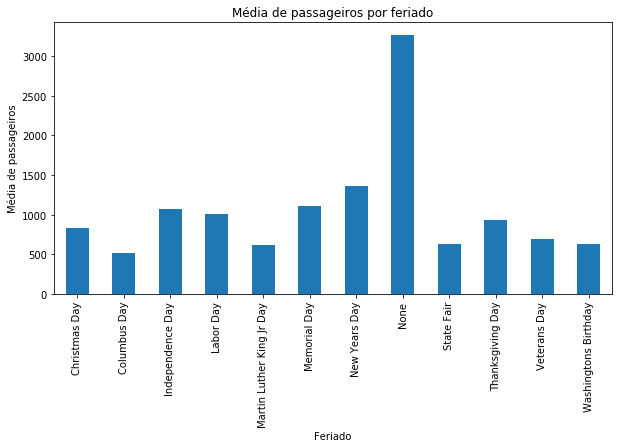

In [14]:
df_base.groupby('holiday').mean()['traffic_volume'].plot.bar(figsize=(10,5))
plt.xlabel('Feriado')
plt.ylabel('Média de passageiros')
plt.title("Média de passageiros por feriado")

   A partir da visualização do gráfico, é possível perceber que o volume de passageiros é menor nos dias de feriado. Apesar, de possuir um impacto no volume de tráfego de passageiros, esse atributo será **_dropado_** devido a seu imenso desbalanceamento. E não é lógico realizar um balanceamento aqui. 

In [15]:
df_base = df_base.drop(columns=['holiday'])
df_base.head()

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,hour,weekday
0,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,9,1
1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,10,1
2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,11,1
3,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,2,12,1
4,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,2,13,1


### Weather_main e Weather_description

Clouds          15158
Clear           13384
Mist             5949
Rain             5672
Snow             2875
Drizzle          1820
Haze             1360
Thunderstorm     1033
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64


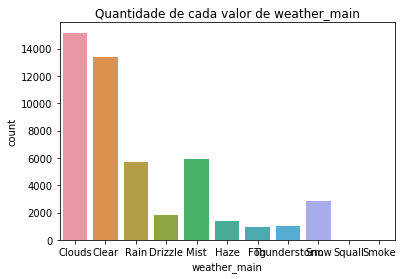

In [16]:
sns.countplot(df_base['weather_main'])
plt.title("Quantidade de cada valor de weather_main")
qtde = df_base['weather_main'].value_counts()
print(qtde)

sky is clear                           11659
mist                                    5949
overcast clouds                         5079
broken clouds                           4663
scattered clouds                        3460
light rain                              3372
few clouds                              1956
light snow                              1945
Sky is Clear                            1725
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1099
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             124
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

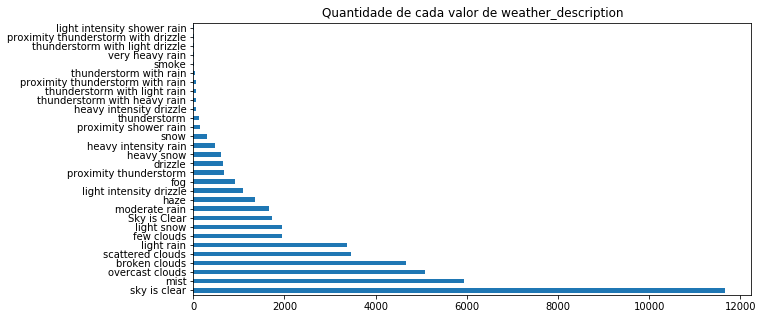

In [17]:
plt.title("Quantidade de cada valor de weather_description")
df_base['weather_description'].value_counts().head(30).plot(kind='barh',figsize=(10,5))
qtde = df_base['weather_description'].value_counts()
print(qtde)

É possível percebe que tanto o **weather_main** quanto o **weather_description** são atributos super desbalanceados, principalmente este último. Foi percebido, que esses dois atributos estão ligados entre si. Cada **description** está associado a um **weather**. 

In [18]:
for weather in df_base['weather_main'].unique():
    loc = df_base.loc[df_base['weather_main']== weather]
    print("Descrições para ", weather, ":", loc['weather_description'].unique())
    

Descrições para  Clouds : ['scattered clouds' 'broken clouds' 'overcast clouds' 'few clouds']
Descrições para  Clear : ['sky is clear' 'Sky is Clear']
Descrições para  Rain : ['light rain' 'proximity shower rain' 'moderate rain'
 'heavy intensity rain' 'freezing rain' 'light intensity shower rain'
 'very heavy rain']
Descrições para  Drizzle : ['light intensity drizzle' 'drizzle' 'heavy intensity drizzle'
 'shower drizzle']
Descrições para  Mist : ['mist']
Descrições para  Haze : ['haze']
Descrições para  Fog : ['fog']
Descrições para  Thunderstorm : ['proximity thunderstorm' 'thunderstorm with light rain'
 'proximity thunderstorm with rain' 'thunderstorm with heavy rain'
 'thunderstorm with rain' 'proximity thunderstorm with drizzle'
 'thunderstorm' 'thunderstorm with light drizzle'
 'thunderstorm with drizzle']
Descrições para  Snow : ['heavy snow' 'snow' 'shower snow' 'light rain and snow' 'light snow'
 'light shower snow' 'sleet']
Descrições para  Squall : ['SQUALLS']
Descrições pa

Para saber se deve manter esses dois atributos na base de dados, será verificado, assim como **holiday**, como o **weather_main** influencia no volume de tráfego de passageiros. 

Text(0, 0.5, 'Média de passageiros')

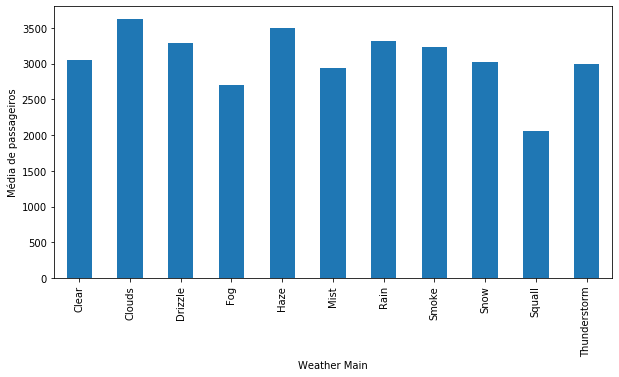

In [19]:
df_base.groupby('weather_main').mean()['traffic_volume'].plot.bar(figsize=(10,5))
plt.xlabel('Weather Main')
plt.ylabel('Média de passageiros')

Percebe-se que não provoca drásticas diminuições no volume de passageiros. Há uma leve diminuição de passageiros quando o clima é _Squall_, mas não é algo tão relevante. Sendo assim, levando em conta que os dois atributos(**weather_main e weather_description**) estão desbalanceados  e que o volume de tráfego de passageitos não está sofrendo grandes mudanças, esses dois atributos serão retirados  da base de dados. 

In [20]:
df_base = df_base.drop(columns=['weather_main'])
df_base = df_base.drop(columns=['weather_description'])
df_base.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,year,month,day,hour,weekday
0,288.28,0.0,0.0,40,5545,2012,10,2,9,1
1,289.36,0.0,0.0,75,4516,2012,10,2,10,1
2,289.58,0.0,0.0,90,4767,2012,10,2,11,1
3,290.13,0.0,0.0,90,5026,2012,10,2,12,1
4,291.14,0.0,0.0,75,4918,2012,10,2,13,1


## Correlação

obs: Novamente não é possível visualizar a matriz de correlação. Mas ela está na referente página da questão no github [link](https://github.com/LuyzaDomingos/IA/blob/master/Regressao/questao2.ipynb)

In [21]:
correl = df_base.corr()
correl.style.background_gradient(cmap = 'coolwarm')

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,year,month,day,hour,weekday
temp,1,0.00907029,-0.0197562,-0.101968,0.130161,0.134916,0.223943,0.022677,0.112048,-0.0078244
rain_1h,0.00907029,1,-8.99063e-05,0.00481843,0.00471506,0.000443471,0.00129963,-0.0022933,0.0034222,-0.00692016
snow_1h,-0.0197562,-8.99063e-05,1,0.027934,0.000736274,-0.00351419,0.0204217,0.0157977,0.00985232,-0.0149286
clouds_all,-0.101968,0.00481843,0.027934,1,0.0671382,-0.0728552,-0.00911762,0.0484245,0.0545218,-0.039816
traffic_volume,0.130161,0.00471506,0.000736274,0.0671382,1,0.00469673,-0.00247962,-0.0077597,0.3523,-0.149551
year,0.134916,0.000443471,-0.00351419,-0.0728552,0.00469673,1,-0.15884,0.0120909,-0.00756136,-0.0123961
month,0.223943,0.00129963,0.0204217,-0.00911762,-0.00247962,-0.15884,1,0.0086861,0.0018437,0.0107621
day,0.022677,-0.0022933,0.0157977,0.0484245,-0.0077597,0.0120909,0.0086861,1,-0.00953101,0.00862729
hour,0.112048,0.0034222,0.00985232,0.0545218,0.3523,-0.00756136,0.0018437,-0.00953101,1,-0.00380821
weekday,-0.0078244,-0.00692016,-0.0149286,-0.039816,-0.149551,-0.0123961,0.0107621,0.00862729,-0.00380821,1


Valores da matriz de correlação dos atributos. Agora podemos visualizar, numericamente, a correlação entre os atributos. 

Como há poucos atributos, para uma melhor visualização, será plotado um gráfico com as correlações dos atributos em relação ao **traffic_volume .**

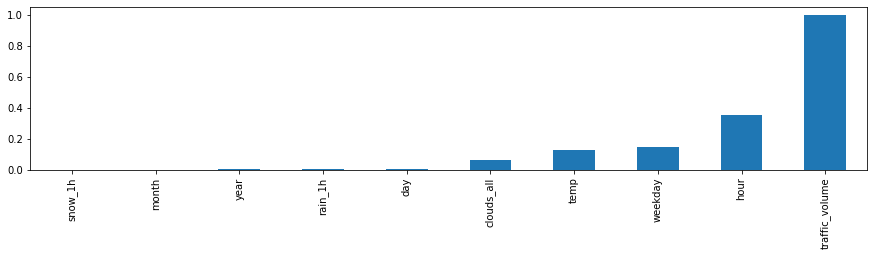

In [22]:
df_base.corr().abs()["traffic_volume"].sort_values().plot.bar(figsize=[15, 3])

Diante do gráfico de correlação, percebe-se que os atributos que mais possuem impacto relevante no traffic_volume, são: **hour, weekday, temp e clouds_all**. 

E os atributos que possuem correlações desprezíveis, são: **day**, **month**, **year**, **snow_1h**, **rain_1h**. Sendo assim,estes serão removidos da base de dados.

In [23]:
df_base = df_base.drop(columns=['day'])
df_base = df_base.drop(columns=['month'])
df_base = df_base.drop(columns=['year'])
df_base = df_base.drop(columns=['snow_1h'])
df_base = df_base.drop(columns=['rain_1h'])

In [24]:
df_base.head()

,temp,clouds_all,traffic_volume,hour,weekday
0,288.28,40,5545,9,1
1,289.36,75,4516,10,1
2,289.58,90,4767,11,1
3,290.13,90,5026,12,1
4,291.14,75,4918,13,1


Mesmo já sabendo quais os atributos mais correlacionados a **traffic_volume**.
Será mostrado como esses atributos interferem no volume de tráfego.

### temp

Text(0, 0.5, 'Tráfego')

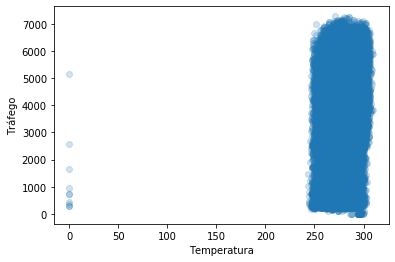

In [25]:
plt.scatter(df_base['temp'],df_base['traffic_volume'],alpha = 0.2)
plt.xlabel('Temperatura')
plt.ylabel('Tráfego')

Quando a temperatura está alta, há um maior volume de tráfego. No entanto, podemos perceber que quando a temperatura está baixa, também há um volume de tráfego, mas não tão grande. Neste caso, podem ser alguns outliers. Pelo valor da temperatura(0 - 300), foi deduzido que, provavelmente, ela foi medida em Kelvin.

### cloud_all

Text(0, 0.5, 'Tráfego')

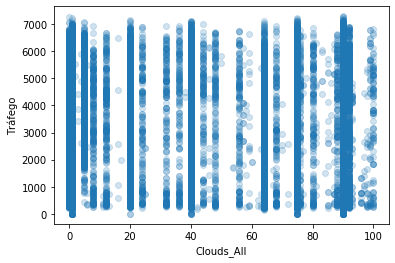

In [26]:
plt.scatter(df_base['clouds_all'],df_base['traffic_volume'],alpha = 0.2)
plt.xlabel('Clouds_All')
plt.ylabel('Tráfego')

Há uma distribuição, quase que, uniforme. Não há muitas reduções no volume de passageiros.

### hour

Text(0, 0.5, 'Tráfego')

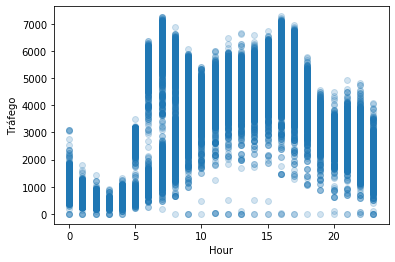

In [27]:
plt.scatter(df_base['hour'],df_base['traffic_volume'],alpha = 0.2)
plt.xlabel('Hour')
plt.ylabel('Tráfego')

Foram identificados que os horários que possuem mais volume de tráfego, foram: **6h, 7h, 8h, 9h, 11h, 12h, 13h, 16h, 17h e 18h**. Então, o volume é maior nos horários de pico.

### weekday

Text(0, 0.5, 'Tráfego')

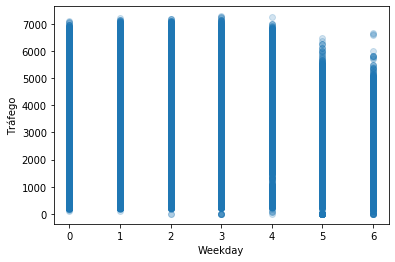

In [28]:
plt.scatter(df_base['weekday'],df_base['traffic_volume'],alpha = 0.2)
plt.xlabel('Weekday')
plt.ylabel('Tráfego')

Pode-se visualizar que há uma distribuição bem uniforme em relação aos dias da semana.

## Identificando Outliers

### temp

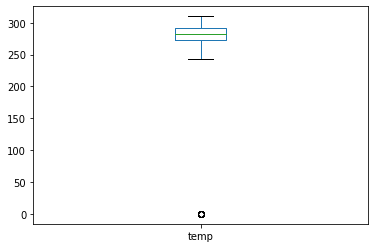

In [29]:
df_base['temp'].plot.box()

Existem alguns outliers em **temp**, provavelmente com valores próximos a _0_. Para não causarem problemas nem no treinamento quanto no teste, eles serão removidos da base de dados. Foi utilizado o boxplot para realizar a visualização dos outliers. No entanto, agora será utilizado o método z-score, com métrica acima de 3 para detectar os outliers. E logo em seguida, os mesmos serão excluídos.

In [30]:
df_base = df_base[(np.abs(stats.zscore(df_base['temp'])) < 3)].copy()
df_base.reset_index(inplace = True) 
df_base.drop(columns = ['index'], inplace = True)

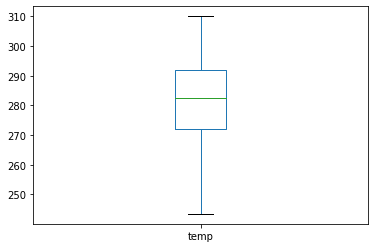

In [31]:
df_base['temp'].plot.box()

Boxplot(**temp**) sem os outleirs.

### clouds_all

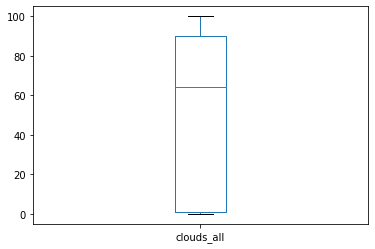

In [32]:
df_base['clouds_all'].plot.box()

Não há outliers. 

### hour

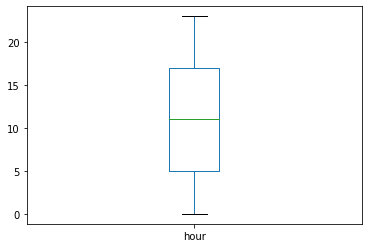

In [33]:
df_base['hour'].plot.box()

Também não tem outliers.

### weekday

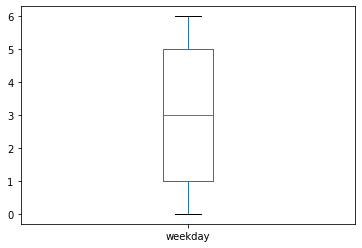

In [34]:
df_base['weekday'].plot.box()

Também não há a presença de outliers!

# Normalização dos Dados

A aplicação da normalização dos dados se faz necessário para evitar que alguns atributos predominem sobre outros. A normalização utilizada aqui é a _StandardScaler_.  

In [35]:
num = df_base.select_dtypes(['float64', 'int64']).columns.values
num = np.delete(num, np.argwhere(num == 'traffic_volume'))

scaler = preprocessing.StandardScaler()
scaled = pd.concat([pd.DataFrame(scaler.fit_transform(df_base[num]), columns = num), df_base['traffic_volume']], axis=1)

scaled.head()

,temp,clouds_all,hour,weekday,traffic_volume
0,0.552067,-0.240326,-0.345665,-0.989296,5545
1,0.637041,0.656825,-0.201581,-0.989296,4516
2,0.654350,1.041318,-0.057497,-0.989296,4767
3,0.697624,1.041318,0.086587,-0.989296,5026
4,0.777091,0.656825,0.230672,-0.989296,4918


# Divisão da Base de Dados - 70/30

In [36]:
trainSample,testSample = model_selection.train_test_split(scaled.copy(), random_state = 42, test_size = 0.3, shuffle = True)
    
trainSample2,testSample2 = model_selection.train_test_split(scaled.copy(), random_state = 43,test_size = 0.3, shuffle = True)

trainTarget = trainSample['traffic_volume'].copy()
testTarget = testSample['traffic_volume'].copy()

trainTarget2 = trainSample2['traffic_volume'].copy()
testTarget2 = testSample2['traffic_volume'].copy()

del trainSample['traffic_volume']
del testSample['traffic_volume']
del trainSample2['traffic_volume']
del testSample2['traffic_volume']



A base de dados foi divida em 70/30, isto é, 70% para o treinamento e 30% para os testes, sendo essa repartição realizada de forma aleatória. Como requerido, o experimento será realizado
duas vezes. Por isso, o conjunto de treinamento e teste possuem duas amostras cada.


# Aplicação do Algoritmo de KNN

O algoritmo de aprendizagem de máquina escolhido é o k-Nearest Neighbors(KNN) para regressão. Com o valor de **k=3**. 

In [37]:
knn = neighbors.KNeighborsRegressor(n_neighbors=3)

knn.fit(trainSample,trainTarget)
result_firstKNN = knn.predict(testSample)
result_trainKNN = knn.predict(trainSample) #predição do com os dados do treino


knn.fit(trainSample2,trainTarget2)
result_secondKNN = knn.predict(testSample2)
result_tKNN = knn.predict(trainSample2)#predição do com os dados do treino

O modelo será avaliado por meio de métricas. As métricas, neste caso, serão: Mean Squared Error (**MSE**), Mean Absolute Error (**MAE**) e Coefficient of Determination (*$R^2$*). Para as duas primeiras métricas de avaliação, valores próximos a 0 indicam que o modelo possui poucos erros. Já em relação a última métrica, valores próximos a 1 indicam que o modelo se ajusta muito bem aos dados.

In [38]:
print("Primeiro conjunto de teste KNN com k=3")

print("MSE = %0.5f" % (metrics.mean_squared_error(testTarget,result_firstKNN)))
print("MAE = %0.5f" % (metrics.mean_absolute_error(testTarget,result_firstKNN)))
print("R² = %0.5f - teste" % (metrics.r2_score(testTarget,result_firstKNN)))
print("R² = %0.5f - treino" % (metrics.r2_score(trainTarget,result_trainKNN)))

print("\n\nSegundo conjunto de teste KNN com k=3")
print("MSE = %0.5f" % (metrics.mean_squared_error(testTarget2,result_secondKNN)))
print("MAE = %0.5f" % (metrics.mean_absolute_error(testTarget2,result_secondKNN)))
print("R² = %0.5f - teste" % (metrics.r2_score(testTarget2,result_secondKNN)))
print("R² = %0.5f - treino" % (metrics.r2_score(trainTarget2,result_tKNN)))

Primeiro conjunto de teste KNN com k=3
MSE = 304405.90050
MAE = 328.09804
R² = 0.92372 - teste
R² = 0.96194 - treino


Segundo conjunto de teste KNN com k=3
MSE = 294229.67094
MAE = 325.20257
R² = 0.92515 - teste
R² = 0.96266 - treino


Nas duas execuções do algortimo os valores de coeficiente de determinação obtido foi superior a 0.9  A partir dos resultados em (*$R^2$*), é possível perceber que nas duas execuções de testes, os valores foram superiores a 0.9. 

Comparando, somente, a métrica do Coefficient of Determination (*$R^2$*), tanto em relação ao valor de treino e teste, é possível perceber que não acontece um overfitting. Pois quando o conjunto de teste foi executado, eĺe apresentou valores diferentes da execução do conjunto de treino.

### Gráfico KNN

In [39]:
def scatter(x, y,title = None):
    fig, ax = plt.subplots()
    ax.scatter(x, y, c='blue',alpha = 0.3)
    line = mlines.Line2D([0, 1], [0, 1], color='black')
    transform = ax.transAxes
    line.set_transform(transform)
    ax.add_line(line)
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    if title != None:
        plt.title(title)
    plt.show()
    
   

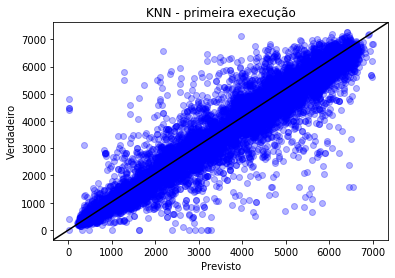

In [40]:
scatter(result_firstKNN,testTarget, "KNN - primeira execução") #primeira execução

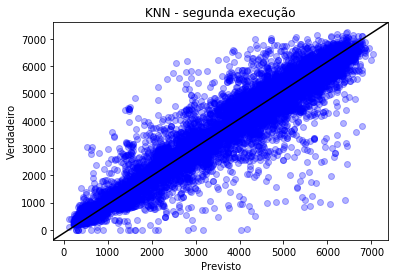

In [41]:
scatter(result_secondKNN,testTarget2, "KNN - segunda execução") #segunda execução

A execução do KNN nas duas amostras apresentaram saídas bem parecidas. A partir das métricas, é possível perceber que o algoritmo conseguiu prever bem a saída desejada na maioria dos casos. No entanto, quando se faz a plotagem do gráfico, é possível visualizar que o algoritmo falhou em alguns casos. Uma hipótese, é inferir que o atributo **holiday**, mesmo totalmente desbalanceado, fez diferença. 

# Aplicação do Algoritmo de Árvore de Decisão

O outro algoritmo a ser utilizado será a Árvore de Decisão para regressão. Da mesma forma que foi feito no KNN, aqui as amostras, de treino e teste, serão executadas duas vezes também.

In [42]:
tdt = tree.DecisionTreeRegressor()

tdt.fit(trainSample, trainTarget)
result_firstTree = tdt.predict(testSample)
result_trainTree = knn.predict(trainSample) #predição do como os dados do treino

tdt.fit(trainSample2, trainTarget2)
result_secondTree = tdt.predict(testSample2)
result_tTree = knn.predict(trainSample2)#predição do como os dados do treino

In [44]:
print("Primeiro conjunto de teste - Árvore de Decisão")

print("MSE = %0.5f" % (metrics.mean_squared_error(testTarget,result_firstTree)))
print("MAE = %0.5f" % (metrics.mean_absolute_error(testTarget,result_firstTree)))
print("R² = %0.5f - teste" % (metrics.r2_score(testTarget,result_firstTree)))
print("R² = %0.5f - treino" % (metrics.r2_score(trainTarget,result_trainTree)))

print("\n\nSegundo conjunto de teste - Árvore de Decisão")
print("MSE = %0.5f" % (metrics.mean_squared_error(testTarget2,result_secondTree)))
print("MAE = %0.5f" % (metrics.mean_absolute_error(testTarget2,result_secondTree)))
print("R² = %0.5f - teste" % (metrics.r2_score(testTarget2,result_secondTree)))
print("R² = %0.5f - treino" % (metrics.r2_score(trainTarget2,result_tTree)))


Primeiro conjunto de teste - Árvore de Decisão
MSE = 344129.74618
MAE = 297.00413
R² = 0.91376 - teste
R² = 0.95056 - treino


Segundo conjunto de teste - Árvore de Decisão
MSE = 353935.53414
MAE = 300.24366
R² = 0.90996 - teste
R² = 0.96266 - treino


O algoritmo de Árvore de Decisão foi avaliado da mesma forma que o algoritmo KNN. 

O algoritmo de Árvore de Decisão obteve resultados parecidos nas duas amostras testadas. Aqui também não acontece overfitting, devido a diferença de valores do R² tanto quanto aos valores de treino quanto aos valores de teste. 

### Gráfico da Árvore de Decisão

In [45]:
def scatter(x, y,title=None):
    fig, ax = plt.subplots()
    ax.scatter(x, y, c='blue',alpha = 0.3)
    line = mlines.Line2D([0, 1], [0, 1], color='black')
    transform = ax.transAxes
    line.set_transform(transform)
    ax.add_line(line)
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    if title != None:
        plt.title(title)
    plt.show()

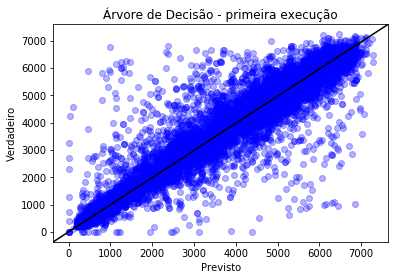

In [46]:
scatter(result_secondTree,testTarget2, "Árvore de Decisão - primeira execução") #primeira execução

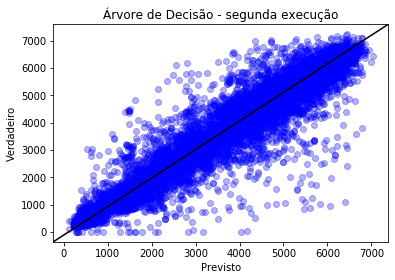

In [47]:
scatter(result_secondKNN,testTarget2, "Árvore de Decisão - segunda execução") #segunda execução

A plotagem do gráfico de Árvore de Decisão mostra que o algortimo também errou na predição de algumas saída.  


Quanto as métricas, comparando os dois algoritmos, o **MAE** apresentou um melhor resultado em Árvore de Decisão. Já o **MSE e R²** apresentaram melhores resultado no KNN. No geral, os resultados foram um pouco inferiores com relação aos do KNN





# Validação Cruzada

A validação cruzada será realizada utilizando os mesmos algoritmos anteriores. Os dados foram divididos em 10 grupos. 

In [48]:
kf = model_selection.KFold(n_splits=10,random_state=42, shuffle=True)

knn = neighbors.KNeighborsRegressor(n_neighbors=3)
tee = tree.DecisionTreeRegressor()

pred_x = scaled.copy()
pred_y = pred_x['traffic_volume']

del pred_x['traffic_volume']

for train_index, test_index in kf.split(scaled):
    x_train, x_test = pred_x.loc[train_index], pred_x.loc[test_index]
    y_train, y_test = pred_y.loc[train_index], pred_y.loc[test_index]

    knn.fit(x_train,y_train)
    resultknn = knn.predict(x_test)
    
    tee.fit(x_train,y_train)
    resulttree = tee.predict(x_test)

print("Validação Cruzada - KNN")
print("MSE = %0.5f" % (metrics.mean_squared_error(y_test,resultknn)))
print("MAE = %0.5f" % (metrics.mean_absolute_error(y_test,resultknn)))
print("R² = %0.5f" % (metrics.r2_score(y_test,resultknn)))

    
print("\nValidação Cruzada - Árvore de Decisão")
print("MSE = %0.5f" % (metrics.mean_squared_error(y_test,resulttree)))
print("MAE = %0.5f" % (metrics.mean_absolute_error(y_test,resulttree)))
print("R² = %0.5f" % (metrics.r2_score(y_test,resulttree)))
        


Validação Cruzada - KNN
MSE = 278136.62383
MAE = 311.24372
R² = 0.93100

Validação Cruzada - Árvore de Decisão
MSE = 330234.61162
MAE = 286.05257
R² = 0.91808


Mesmo realizando a validação cruzada, os resultados das métricas se mostraram similares aos resultados obtidos nos dois algoritmos executados anteriormente. Novamente o algoritmo de KNN se mostra melhor que de Árvore de Decisão.


# Conclusão

Pode concluir que os modelos utilizados não aparentam ter overfitting, pois adaptaram-se as diferentes amostras utilizadas. E mesmo realizando a validação cruzada, os resultados obtidos foram bastante semelhantes aos resultados até então conhecidos. 